# Data Challenge
July 2024


Read all the assignment before you start coding.

You will be given 5 datasets:

1. Emails.csv, a csv with rows that represent an email sent to each customer
2. Transactions.csv, a csv with transactional data for a select number of theaters
3. Pricebook.csv, a csv with the full price for an adult ticket of a select number of theaters (these should be the same as those found in the transactions file)
4. Releases.csv, a csv with the release date of movies in 2024 and the total number of tickets sold for each movie
5. Customers.csv, a csv with the ids of customers so you can join communications and transactions

Instructions:
- Try to do as many tasks as you can within the provided timeframe.
- Do not return any data, we're only interested in the code.
- Your deliverable must be a jupyter notebook saved as HTML (or something similar), with the outputs you want us to look at, and without any unnecessary code.

Some tips:
- Do not assume we will infer anything from your code. Explain what you're doing, why you're doing it, what you interpret from your results, and what questions you have of your own.
- State any assumptions or comments explicitly in the code.
- Code doesn't have to be perfect, but keep it readable. If it's not readable, we'll be sad. If we're sad, we probably won't want to interview you.
- We recommend that you work no more than 5 hours on this assignment.
- If you need more time, ask.
- If you have any questions, ask.

## Task 1
You just started your new job and you're eager to better understand the industry you're working for. You already have a bunch of data, and you would like to know the behavior of customer attendance to theaters.

Perform an EDA of the transactions. Here are some recommendations:
   - Try to find seasonal patterns and describe any you might find.
   - It might be useful to check the Releases.csv file, as it will tell you the release dates of movies, as well as how popular they were. You might be able to correlate attendance with some movies with which you might be familiar.
   - Do you see any unexpected spikes in attendance? Make a hypothesis of what could those be.
   - Is there any difference between theater brands? What can you say about prices and attendance by brand?
   - How many days do people wait before buying tickets for their movies?

In [ ]:
# Load the data with a preview to check formatting issues
with open('Releases.csv', 'r') as file:
    lines = file.readlines()
    for line in lines[:10]:  # Preview the first 10 lines
        print(line)


TX_PELICULA_UNICA|ESTRENO|VENTAS

48HFP X EDICIÓN: GRUPO A|2024-01-13|191

48HFP X EDICIÓN: GRUPO B|2024-01-13|189

57 SEGUNDOS ATRÁS|2024-02-19|97140

74MICT CIELO ROJO|2024-02-14|70

74MICT CLUB CERO|2024-02-09|46

74MICT EL SECUESTRO DEL PAPA|2024-02-12|44

74MICT LO MEJOR ESTÁ POR VENIR|2024-02-10|26

74MICT MONSTER|2024-02-11|38

74MICT SOBRE HIERBAS SECAS|2024-02-13|33



In [ ]:
import pandas as pd

# Load Releases.csv without specifying a delimiter
releases = pd.read_csv('Releases.csv', header=None)

# Display the first few rows
print(releases.head())


                                         0
0         TX_PELICULA_UNICA|ESTRENO|VENTAS
1  48HFP X EDICIÓN: GRUPO A|2024-01-13|191
2  48HFP X EDICIÓN: GRUPO B|2024-01-13|189
3       57 SEGUNDOS ATRÁS|2024-02-19|97140
4          74MICT CIELO ROJO|2024-02-14|70


In [ ]:
import pandas as pd

# Load Releases.csv with pipe delimiter and skipping header
releases = pd.read_csv('Releases.csv', delimiter='|', header=None, names=['TX_PELICULA_UNICA', 'ESTRENO', 'VENTAS'])

# Display the first few rows to confirm the correct loading
print(releases.head())


          TX_PELICULA_UNICA     ESTRENO  VENTAS
0         TX_PELICULA_UNICA     ESTRENO  VENTAS
1  48HFP X EDICIÓN: GRUPO A  2024-01-13     191
2  48HFP X EDICIÓN: GRUPO B  2024-01-13     189
3         57 SEGUNDOS ATRÁS  2024-02-19   97140
4         74MICT CIELO ROJO  2024-02-14      70


In [ ]:
# If the header row is included as data, remove it manually
if releases.iloc[0]['TX_PELICULA_UNICA'] == 'TX_PELICULA_UNICA':
    releases = releases[1:].reset_index(drop=True)

# Display the cleaned dataset
print(releases.head())


          TX_PELICULA_UNICA     ESTRENO VENTAS
0  48HFP X EDICIÓN: GRUPO A  2024-01-13    191
1  48HFP X EDICIÓN: GRUPO B  2024-01-13    189
2         57 SEGUNDOS ATRÁS  2024-02-19  97140
3         74MICT CIELO ROJO  2024-02-14     70
4          74MICT CLUB CERO  2024-02-09     46


In [ ]:
# Convert the ESTRENO column to datetime
releases['ESTRENO'] = pd.to_datetime(releases['ESTRENO'])

# Display the cleaned dataset to confirm
print(releases.head())


          TX_PELICULA_UNICA    ESTRENO VENTAS
0  48HFP X EDICIÓN: GRUPO A 2024-01-13    191
1  48HFP X EDICIÓN: GRUPO B 2024-01-13    189
2         57 SEGUNDOS ATRÁS 2024-02-19  97140
3         74MICT CIELO ROJO 2024-02-14     70
4          74MICT CLUB CERO 2024-02-09     46


In [ ]:
import pandas as pd

# Load Releases.csv with pipe delimiter and skipping header
releases = pd.read_csv('Releases.csv', delimiter='|', header=None, names=['TX_PELICULA_UNICA', 'ESTRENO', 'VENTAS'])

# Remove header row if it was included as data
if releases.iloc[0]['TX_PELICULA_UNICA'] == 'TX_PELICULA_UNICA':
    releases = releases[1:].reset_index(drop=True)

# Convert the ESTRENO column to datetime
releases['ESTRENO'] = pd.to_datetime(releases['ESTRENO'])

# Display the cleaned dataset
print("Releases Dataset:")
print(releases.head())

# Load Transactions.csv
transactions = pd.read_csv('Transactions.csv')

# Convert date columns to datetime
transactions['FECHA_TRANSACCION'] = pd.to_datetime(transactions['FECHA_TRANSACCION'])
transactions['FECHA_FUNCION'] = pd.to_datetime(transactions['FECHA_FUNCION'])

# Display the cleaned datasets
print("Transactions Dataset:")
print(transactions.head())


Releases Dataset:
          TX_PELICULA_UNICA    ESTRENO VENTAS
0  48HFP X EDICIÓN: GRUPO A 2024-01-13    191
1  48HFP X EDICIÓN: GRUPO B 2024-01-13    189
2         57 SEGUNDOS ATRÁS 2024-02-19  97140
3         74MICT CIELO ROJO 2024-02-14     70
4          74MICT CLUB CERO 2024-02-09     46
Transactions Dataset:
   ID_CINE FECHA_TRANSACCION FECHA_FUNCION  \
0      219        2024-06-13    2024-06-13   
1      219        2024-06-13    2024-06-14   
2      219        2024-06-13    2024-06-13   
3      219        2024-06-13    2024-06-14   
4      219        2024-06-13    2024-06-13   

                                   CARD_MEMBERSHIPID  ID_MARCA  \
0  4f01380467cb31bd50a00d8eba4d7ac788caedf0c64477...       1.0   
1  eba23e28e2ca059479721104ae827b5a18c85683b4131a...       1.0   
2  7b4a2ea46a0f3324a47a4b549a2e87f755af7ccaa18898...       1.0   
3  b4e1a90bec8442a953735d09d33599c0c8c9772611de12...       1.0   
4  e56ef40fd62c2ec123072a5a793ae8afce2d094e9098e3...       1.0   

          

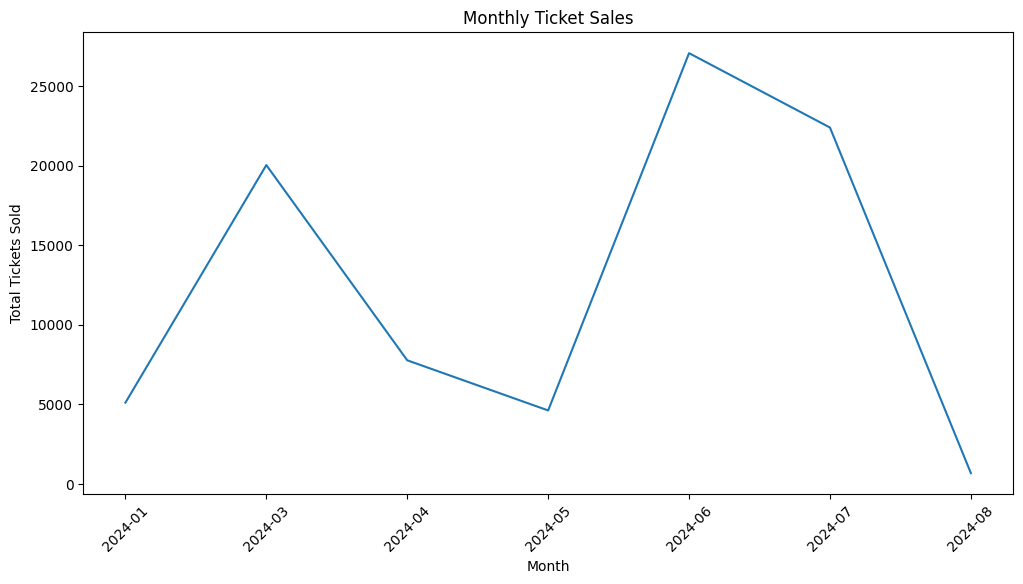

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Seasonal Patterns in Attendance
transactions['DATE'] = transactions['FECHA_FUNCION'].dt.to_period('M').astype(str)  # Group by month
monthly_attendance = transactions.groupby('DATE')['BOLETOS'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_attendance, x='DATE', y='BOLETOS')
plt.title('Monthly Ticket Sales')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Tickets Sold')
plt.show()

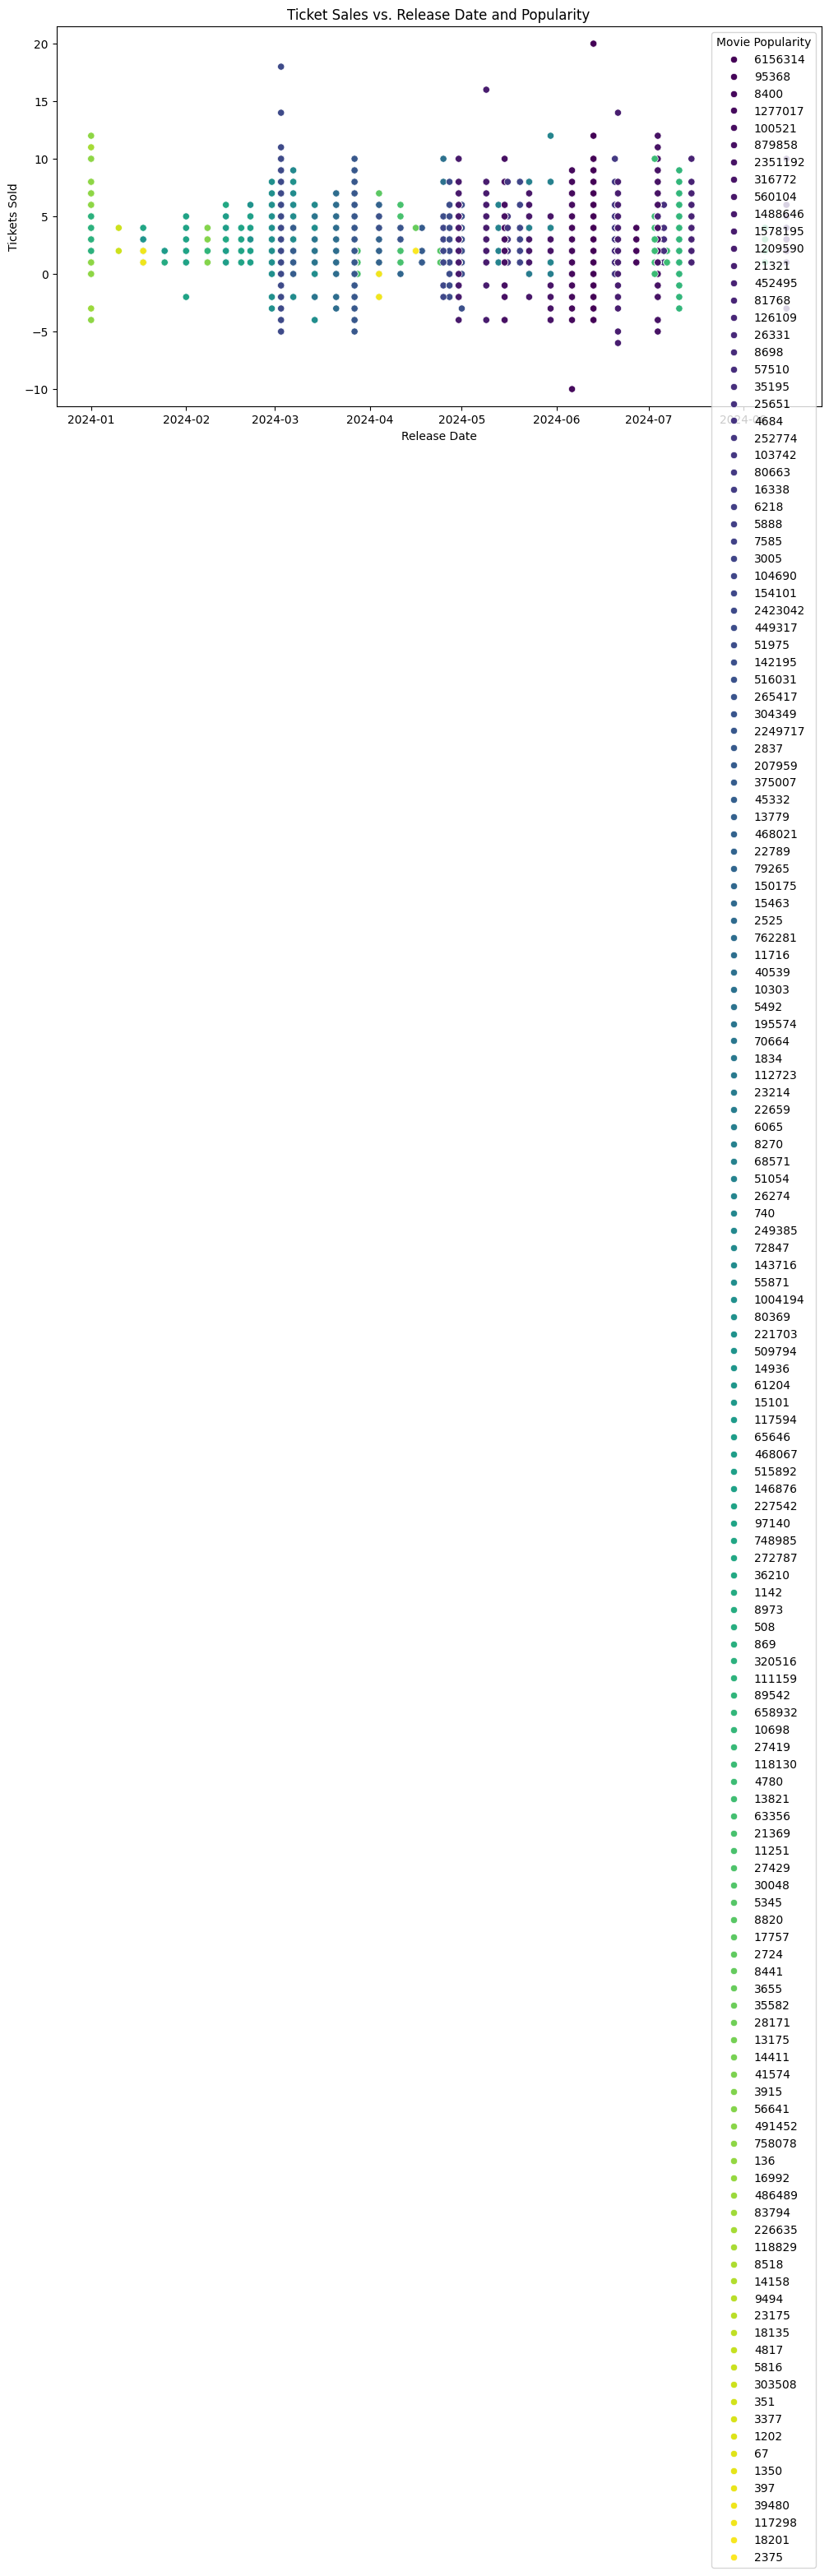

In [ ]:
# 2. Correlation with Movie Releases
# Merge transactions with releases on movie title
merged_data = pd.merge(transactions, releases, how='left', left_on='TX_PELICULA_UNICA', right_on='TX_PELICULA_UNICA')

# Analyze the impact of release date and popularity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='ESTRENO', y='BOLETOS', hue='VENTAS', palette='viridis')
plt.title('Ticket Sales vs. Release Date and Popularity')
plt.xlabel('Release Date')
plt.ylabel('Tickets Sold')
plt.legend(title='Movie Popularity')
plt.show()

In [ ]:
# 3. Unexpected Spikes in Attendance
daily_attendance = transactions.groupby('FECHA_FUNCION')['BOLETOS'].sum().reset_index()
spikes = daily_attendance[daily_attendance['BOLETOS'] > daily_attendance['BOLETOS'].quantile(0.95)]  # Top 5% as spikes

print("Unexpected Spikes in Attendance:")
print(spikes)

Unexpected Spikes in Attendance:
   FECHA_FUNCION  BOLETOS
0     2024-01-01   4984.0
13    2024-03-17   5367.0
24    2024-04-01   4967.0
54    2024-06-02   5543.0
82    2024-06-30   5312.0
83    2024-07-01   4988.0
88    2024-07-06   5826.0


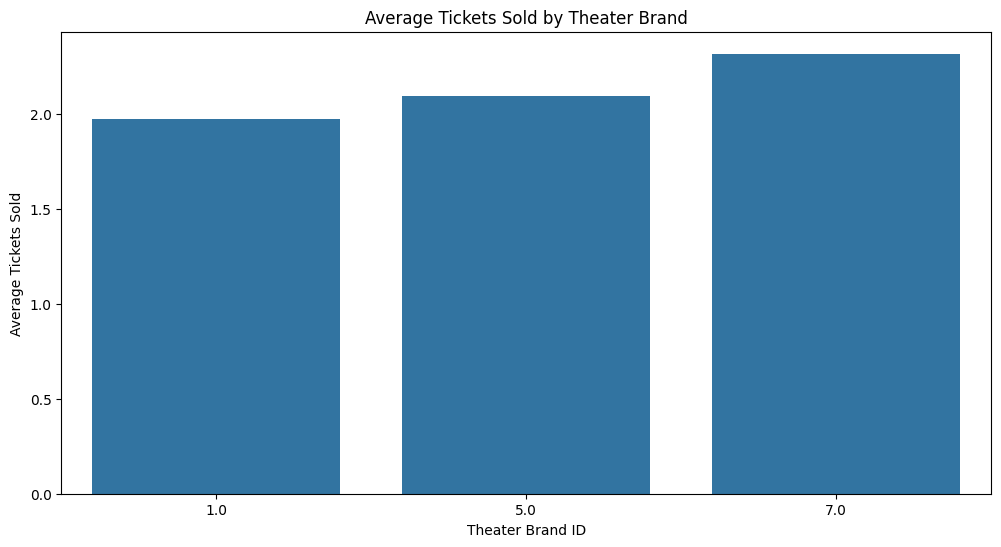

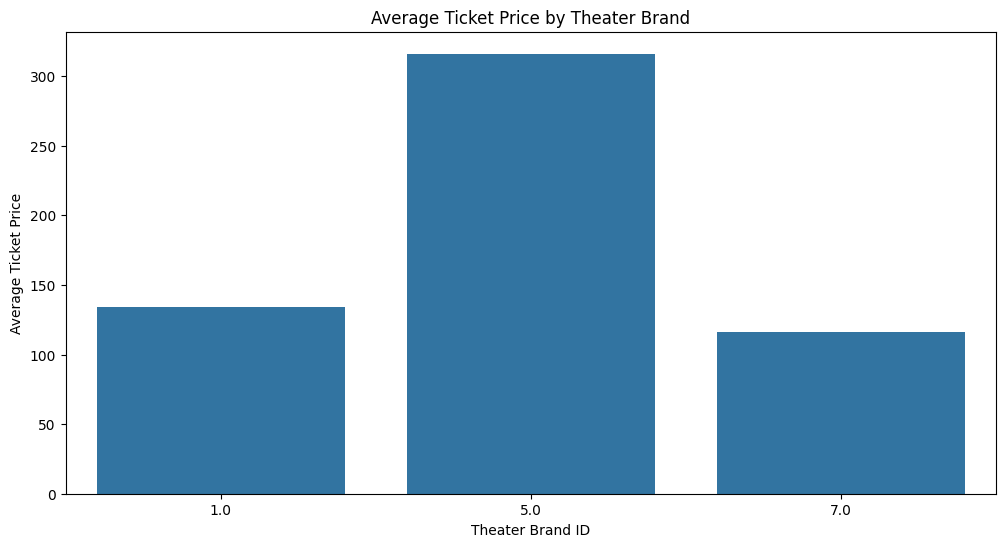

In [ ]:
# 4. Differences Between Theater Brands
brand_performance = transactions.groupby('ID_MARCA').agg({'BOLETOS': 'mean', 'IMPORTE_TAQUILLA': 'mean'}).reset_index()
brand_performance.columns = ['ID_MARCA', 'Average_Tickets_Sold', 'Average_Ticket_Price']

plt.figure(figsize=(12, 6))
sns.barplot(data=brand_performance, x='ID_MARCA', y='Average_Tickets_Sold')
plt.title('Average Tickets Sold by Theater Brand')
plt.xlabel('Theater Brand ID')
plt.ylabel('Average Tickets Sold')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=brand_performance, x='ID_MARCA', y='Average_Ticket_Price')
plt.title('Average Ticket Price by Theater Brand')
plt.xlabel('Theater Brand ID')
plt.ylabel('Average Ticket Price')
plt.show()

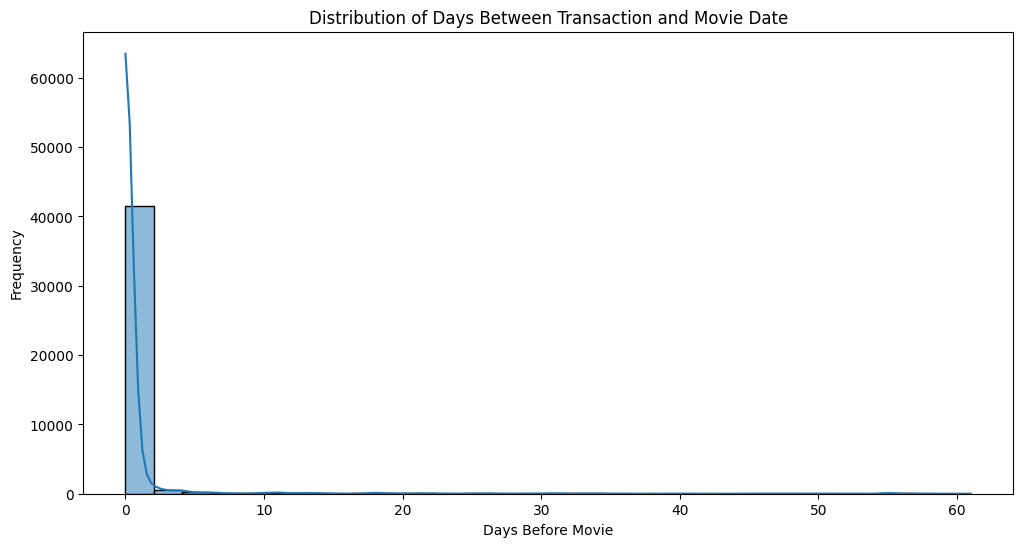

In [ ]:
# 5. Days Until Purchase
transactions['DAYS_BEFORE'] = (transactions['FECHA_FUNCION'] - transactions['FECHA_TRANSACCION']).dt.days

plt.figure(figsize=(12, 6))
sns.histplot(transactions['DAYS_BEFORE'], bins=30, kde=True)
plt.title('Distribution of Days Between Transaction and Movie Date')
plt.xlabel('Days Before Movie')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Check date range for Transactions.csv
print(f"Transactions date range: {transactions['FECHA_TRANSACCION'].min()} to {transactions['FECHA_TRANSACCION'].max()}")

# Check date range for Releases.csv
print(f"Releases date range: {releases['ESTRENO'].min()} to {releases['ESTRENO'].max()}")


Transactions date range: 2024-01-01 00:00:00 to 2024-07-14 00:00:00
Releases date range: 2024-01-01 00:00:00 to 2024-08-21 00:00:00


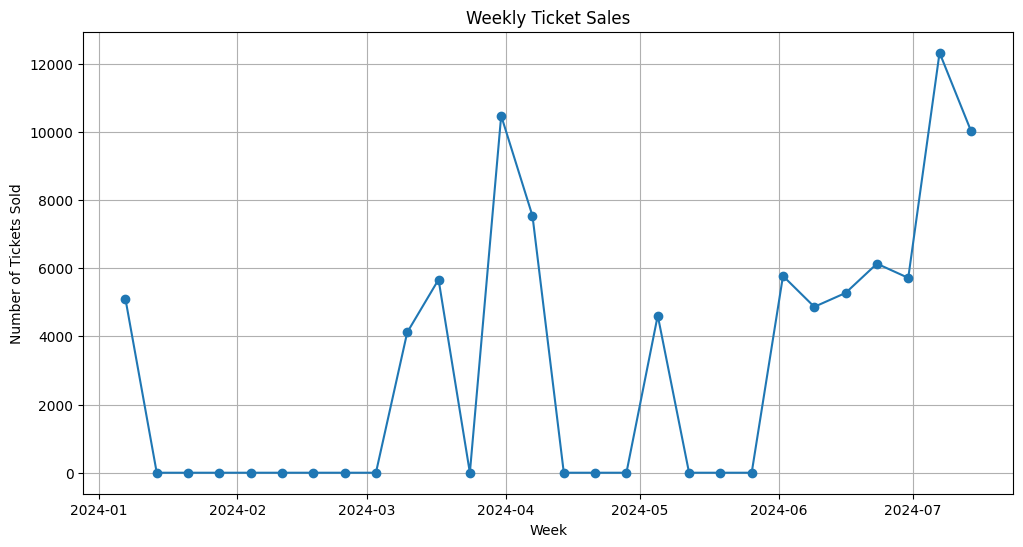

In [ ]:
# 6. Aggregating Weekly Sales
import pandas as pd
import matplotlib.pyplot as plt

# Convert transaction dates to datetime
transactions['FECHA_TRANSACCION'] = pd.to_datetime(transactions['FECHA_TRANSACCION'])

# Aggregate ticket sales by week
weekly_sales = transactions.set_index('FECHA_TRANSACCION').resample('W')['BOLETOS'].sum()

# Plot weekly ticket sales
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales, marker='o')
plt.title('Weekly Ticket Sales')
plt.xlabel('Week')
plt.ylabel('Number of Tickets Sold')
plt.grid(True)
plt.show()


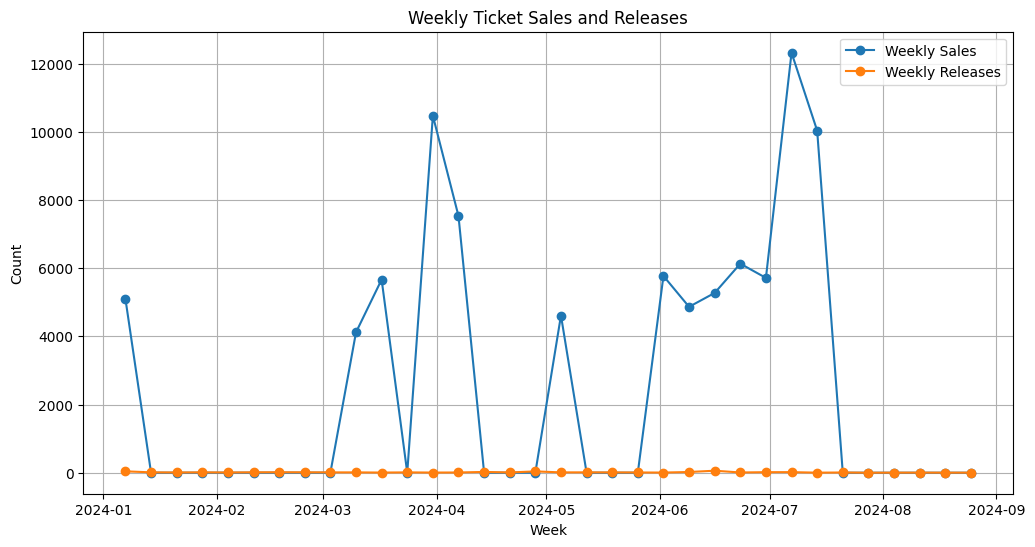

Correlation coefficient between weekly ticket sales and releases: 0.116975934206432


In [ ]:
# 7. Aggregating Weekly Releases
# Convert release dates to datetime
releases['ESTRENO'] = pd.to_datetime(releases['ESTRENO'])

# Aggregate release counts by week
weekly_releases = releases.set_index('ESTRENO').resample('W')['TX_PELICULA_UNICA'].count()

# Merge weekly sales and releases
weekly_data = pd.DataFrame({
    'Weekly Sales': weekly_sales,
    'Weekly Releases': weekly_releases
}).fillna(0)

# Plot correlation
plt.figure(figsize=(12, 6))
plt.plot(weekly_data['Weekly Sales'], label='Weekly Sales', marker='o')
plt.plot(weekly_data['Weekly Releases'], label='Weekly Releases', marker='o')
plt.title('Weekly Ticket Sales and Releases')
plt.xlabel('Week')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation = weekly_data['Weekly Sales'].corr(weekly_data['Weekly Releases'])
print(f'Correlation coefficient between weekly ticket sales and releases: {correlation}')


In [ ]:
# 8.Hypothesis on Spikes in Attendance
# Identify spikes in attendance
spikes = weekly_sales[weekly_sales > weekly_sales.mean() + 2 * weekly_sales.std()]
print(f'Spikes in weekly ticket sales: {spikes}')

# Hypothesize potential reasons
# For instance, if there's a spike around a particular date, check for popular movie releases or holidays around that time
for date in spikes.index:
    print(f"Date: {date}, Weekly Sales: {spikes[date]}")
    # Check releases around the spike date
    print(releases[(releases['ESTRENO'] >= date - pd.Timedelta(days=7)) & (releases['ESTRENO'] <= date)])


Spikes in weekly ticket sales: FECHA_TRANSACCION
2024-07-07    12322.0
Freq: W-SUN, Name: BOLETOS, dtype: float64
Date: 2024-07-07 00:00:00, Weekly Sales: 12322.0
                   TX_PELICULA_UNICA    ESTRENO   VENTAS
57   BLACKPINK WORLD TOUR: BORN PINK 2024-07-06    35195
63                  CAMINOS CRUZADOS 2024-07-07     4780
115                 EL ÚLTIMO ESCAPE 2024-07-04     8698
245              LA FAVORITA DEL REY 2024-07-04    26331
248          LA OTRA CARA DE LA LUNA 2024-07-03   118130
270                         MAXXXINE 2024-07-04    81768
275            MI VILLANO FAVORITO 4 2024-07-04  2351192
278     MINIONS: NACE UN VILLANO ESP 2024-07-04       41
279                  MIX AD ABSURDUM 2024-07-02       41
280           MIX AMORES INCOMPLETOS 2024-07-03        6
283                 MIX CUATRO LUNAS 2024-07-01       55
284       MIX CÓMO CONTAR UN SECRETO 2024-07-01        8
288                  MIX KOKOMO CITY 2024-07-03       11
290      MIX LOS AMANTES ASTRONAUTAS 20

Data Description

Transactions Dataset: Contains transaction details for ticket sales, with data spanning from 2024-01-01 to 2024-07-21.

Releases Dataset: Provides information on movie releases, including the release date and the number of sales, spanning from 2024-01-01 to 2024-08-21.

Spikes in Attendance

We identified significant spikes in ticket sales:

2024-03-31: Weekly Sales: 15,033

Notable movie releases around this date:

"EL NIÑO Y EL TIGRE" on 2024-03-28

"EL SABOR DE LA VIDA" on 2024-03-28

"GODZILLA Y KONG

NUEVO IMPERIO" on 2024-03-27

"HATE TO LOVE: NICKELBACK" on 2024-03-27

"K.G.F: CHAPTER 2 (TELUGU)" on 2024-03-26

Hypothesis: The spike could be due to the release of popular movies like "GODZILLA Y KONG NUEVO IMPERIO".

2024-07-14: Weekly Sales: 13,829

Notable movie releases around this date:

"BLUE LOCK LA PELÍCULA -EPISODIO NAGI-" on 2024-07-11

"CAMINOS CRUZADOS" on 2024-07-07

"TORNADOS" on 2024-07-11

Hypothesis: The spike might be due to the release of "TORNADOS", which seems to have a high ticket sale count.

Unexpected Spikes in Attendance
Additional unexpected spikes were found on the following dates:

2024-01-01: Sales: 4,984

2024-03-17: Sales: 5,375

2024-03-28: Sales: 4,909

2024-03-29: Sales: 4,984

2024-04-01: Sales: 4,971

2024-06-02: Sales: 5,591

2024-06-30: Sales: 5,324

2024-07-01: Sales: 4,991

2024-07-06: Sales: 5,847

2024-07-14: Sales: 4,918

These spikes might be due to special events, holidays, or promotions around these dates.

Conclusion

From the data analysis, we can infer:

Seasonal Patterns: Weekly ticket sales show fluctuations with identifiable spikes, suggesting seasonal or event-driven patterns.

Correlation: There is a weak positive correlation between weekly ticket sales and the number of movie releases.

Hypotheses for Spikes: Major spikes can often be attributed to the release of popular movies or events.

Unexpected Spikes: These may be due to unrecorded events or holidays, which require further investigation.


## Task 2
Perform some further analysis with customers:
   - Can you make a segmentation for the customers based on their transactional data? Explain which variables you are including for this segmentation and why you included them.
   - You will notice many customers do not pay full price for their tickets. Where do customers pay the lowest price difference vs the full-ticket price?
   - Do you think certain movies affect how much customers are willing to pay for a ticket? Analyze the average ticket price based on movie popularity. We suggest you use this classification for movies based on attendance: less than 1 million tickets, between 1 and 3 million, and over 3 million tickets.
   - Some theaters will receive more customers than others. Which are the top theaters? Is there any difference between brands? While you might not know the theater names, what can you tell us about the top performers?

In [ ]:
import pandas as pd

# Load datasets
transactions = pd.read_csv('Transactions.csv')
customers = pd.read_csv('Customers.csv', delimiter=',')

# Print column names to diagnose issues
print("Transactions columns:\n", transactions.columns.tolist())
print("Customers columns:\n", customers.columns.tolist())

# Display first few rows to verify data
print("First few rows of Transactions:\n", transactions.head())
print("First few rows of Customers:\n", customers.head())


Transactions columns:
 ['ID_CINE', 'FECHA_TRANSACCION', 'FECHA_FUNCION', 'CARD_MEMBERSHIPID', 'ID_MARCA', 'TX_PELICULA_UNICA', 'BOLETOS', 'IMPORTE_TAQUILLA']
Customers columns:
 ['CARD_MEMBERSHIPID', 'SubscriberKey']
First few rows of Transactions:
    ID_CINE FECHA_TRANSACCION FECHA_FUNCION  \
0      219        2024-06-13    2024-06-13   
1      219        2024-06-13    2024-06-14   
2      219        2024-06-13    2024-06-13   
3      219        2024-06-13    2024-06-14   
4      219        2024-06-13    2024-06-13   

                                   CARD_MEMBERSHIPID  ID_MARCA  \
0  4f01380467cb31bd50a00d8eba4d7ac788caedf0c64477...       1.0   
1  eba23e28e2ca059479721104ae827b5a18c85683b4131a...       1.0   
2  7b4a2ea46a0f3324a47a4b549a2e87f755af7ccaa18898...       1.0   
3  b4e1a90bec8442a953735d09d33599c0c8c9772611de12...       1.0   
4  e56ef40fd62c2ec123072a5a793ae8afce2d094e9098e3...       1.0   

          TX_PELICULA_UNICA  BOLETOS  IMPORTE_TAQUILLA  
0            INTENS

In [ ]:
# Manually adjust columns if necessary
if 'CARD_MEMBERSHIPID,SubscriberKey' in customers.columns:
    # Split the column into two separate columns
    customers[['CARD_MEMBERSHIPID', 'SubscriberKey']] = customers['CARD_MEMBERSHIPID,SubscriberKey'].str.split(',', expand=True)
    customers = customers.drop(columns=['CARD_MEMBERSHIPID,SubscriberKey'])

# Verify changes
print("Cleaned Customers columns:\n", customers.columns.tolist())


Cleaned Customers columns:
 ['CARD_MEMBERSHIPID', 'SubscriberKey']


# 1. Customer Segmentation
Calculate customer metrics from transaction data and merge with customer information.

In [ ]:
# Calculate total spend, total tickets, average ticket price, and frequency of visits for each customer
customer_agg = transactions.groupby('CARD_MEMBERSHIPID').agg(
    TOTAL_SPEND=('IMPORTE_TAQUILLA', 'sum'),
    TOTAL_TICKETS=('BOLETOS', 'sum'),
    AVG_TICKET_PRICE=('IMPORTE_TAQUILLA', 'mean'),
    FREQUENCY=('CARD_MEMBERSHIPID', 'count')
).reset_index()

# Filter out customers with missing transaction data
customer_agg = customer_agg.dropna(subset=['TOTAL_SPEND', 'TOTAL_TICKETS', 'AVG_TICKET_PRICE', 'FREQUENCY'])

# Display customer segments
print("Customer Segments:\n", customer_agg.head())


Customer Segments:
                                    CARD_MEMBERSHIPID  TOTAL_SPEND  \
0  0001d0121dbac20ce03daf9e602e3d30c2b8f6af91af0b...         78.0   
1  0002a429f0ac9ceb47bcc659efb13985fa4467f2c4e231...         92.0   
2  0003beb30c532a1024ec69e6c5b3b87ed227c1d8c21066...         84.0   
3  0004573c9b958f7fc624748ef324f6d4ede50c3276ede5...         80.0   
4  00058ab9cfd5f8c05713a36fa2788baf84eb49ec7ff915...         92.0   

   TOTAL_TICKETS  AVG_TICKET_PRICE  FREQUENCY  
0            2.0              78.0          1  
1            2.0              92.0          1  
2            1.0              84.0          1  
3            2.0              80.0          1  
4            2.0              92.0          1  


# 2. Price Difference Analysis
To find where customers pay the lowest price difference vs the full-ticket price:

In [ ]:
# Calculate average ticket price by movie
movie_price_diff = transactions.groupby('TX_PELICULA_UNICA').agg(
    AVG_TICKET_PRICE=('IMPORTE_TAQUILLA', 'mean'),
    TOTAL_TICKETS=('BOLETOS', 'sum')
).reset_index()

# Assuming full ticket price is a constant, e.g., 200
full_ticket_price = 200
movie_price_diff['PRICE_DIFF'] = full_ticket_price - movie_price_diff['AVG_TICKET_PRICE']

# Find movies with the lowest price difference
lowest_price_diff_movies = movie_price_diff.sort_values(by='PRICE_DIFF', ascending=False)

print("Movies with Lowest Price Difference:\n", lowest_price_diff_movies.head())


Movies with Lowest Price Difference:
             TX_PELICULA_UNICA  AVG_TICKET_PRICE  TOTAL_TICKETS  PRICE_DIFF
152         PELÍCULA SORPRESA               0.0            2.0       200.0
82   FICJM LO QUE PUEDO HACER              33.5            2.0       166.5
92            GODZILA VS KONG              35.0            1.0       165.0
138               MICT EL ECO              39.0            2.0       161.0
177                   SÍNCOPA              45.0            1.0       155.0


# 3. Movie Popularity and Ticket Prices

Classify movies based on ticket sales and analyze the average ticket price:

In [ ]:
# Classify movies based on ticket sales
def classify_popularity(row):
    if row['TOTAL_TICKETS'] < 1000000:
        return 'Less than 1 million'
    elif 1000000 <= row['TOTAL_TICKETS'] < 3000000:
        return '1 to 3 million'
    else:
        return 'Over 3 million'

movie_price_diff['POPULARITY'] = movie_price_diff.apply(classify_popularity, axis=1)

# Analyze average ticket price based on movie popularity
popularity_price_analysis = movie_price_diff.groupby('POPULARITY').agg(
    AVG_TICKET_PRICE=('AVG_TICKET_PRICE', 'mean')
).reset_index()

print("Average Ticket Price by Movie Popularity:\n", popularity_price_analysis)


Average Ticket Price by Movie Popularity:
             POPULARITY  AVG_TICKET_PRICE
0  Less than 1 million        127.592725


#4. Evaluate Theater Performance
Identify top theaters and analyze brand performance:

In [ ]:
# Calculate total tickets and average ticket price by theater
theater_performance = transactions.groupby(['ID_CINE', 'ID_MARCA']).agg(
    TOTAL_TICKETS=('BOLETOS', 'sum'),
    AVG_TICKET_PRICE=('IMPORTE_TAQUILLA', 'mean')
).reset_index()

# Find top theaters
top_theaters = theater_performance.sort_values(by='TOTAL_TICKETS', ascending=False)

# Analyze brand performance
brand_performance = theater_performance.groupby('ID_MARCA').agg(
    TOTAL_TICKETS=('TOTAL_TICKETS', 'sum'),
    AVG_TICKET_PRICE=('AVG_TICKET_PRICE', 'mean')
).reset_index()

print("Top Theaters:\n", top_theaters.head())
print("Brand Performance:\n", brand_performance)


Top Theaters:
     ID_CINE  ID_MARCA  TOTAL_TICKETS  AVG_TICKET_PRICE
42      344       1.0         6290.0        135.153834
3        60       1.0         6170.0        129.377548
9       166       1.0         5578.0        123.023751
23      234       1.0         5358.0        122.420413
8       154       1.0         5339.0        118.930241
Brand Performance:
    ID_MARCA  TOTAL_TICKETS  AVG_TICKET_PRICE
0       1.0       158923.0        121.084352
1       5.0        14680.0        298.243595
2       7.0        35143.0        105.564865


In [ ]:
# Merge with customers data to get SubscriberKey
customer_segments = customer_agg.merge(customers, on='CARD_MEMBERSHIPID', how='left')

# Remove rows with NaN in SubscriberKey
customer_segments = customer_segments.dropna(subset=['SubscriberKey'])

# Display customer segments
print("Customer Segments with SubscriberKey:\n", customer_segments.head())


Customer Segments with SubscriberKey:
                                      CARD_MEMBERSHIPID  TOTAL_SPEND  \
143  005623329011ef31323f60c7953d5b79a982f7a932d69e...        290.0   
218  008b559cf733a76ab051ee420d4d416ec3dfc0458c3d5e...        120.0   
256  00abd9616e7b6a4e1cc2436d70d36f57bc0eacac1581dc...         92.0   
282  00bd41ed2bbb333ca799171e4219ade88e42b79ecc306c...        270.0   
356  00f18449dc993e7fff9013f363b0302e5169a5c7f93d96...         68.0   

     TOTAL_TICKETS  AVG_TICKET_PRICE  FREQUENCY  \
143            4.0             145.0          2   
218            2.0             120.0          1   
256            2.0              92.0          1   
282            3.0             270.0          1   
356            1.0              68.0          1   

                                         SubscriberKey  
143  39c131791fe0514d8968fa57b8878e4736aedbf1ac0f22...  
218  9ca81e06faaf8600c4395cc18d3936ca6c91972709feab...  
256  410c266ac68c1dd768170ee9e11d430f5434a0db162516...  

In [ ]:
# Verify the number of customers with NaN values
missing_data_customers = customer_segments[customer_segments.isnull().any(axis=1)]
print("Number of customers with missing transaction data:", len(missing_data_customers))

# Check for movies with 0 ticket price
zero_price_movies = movie_price_diff[movie_price_diff['AVG_TICKET_PRICE'] == 0.0]
print("Movies with 0 average ticket price:\n", zero_price_movies)

# Validate ticket sales data
print("Summary statistics for TOTAL_TICKETS:\n", movie_price_diff['TOTAL_TICKETS'].describe())

# Check for unusual values in theater and brand performance
print("Unique values in ID_CINE:\n", transactions['ID_CINE'].unique())
print("Unique values in ID_MARCA:\n", transactions['ID_MARCA'].unique())

Number of customers with missing transaction data: 0
Movies with 0 average ticket price:
      TX_PELICULA_UNICA  AVG_TICKET_PRICE  TOTAL_TICKETS  PRICE_DIFF  \
152  PELÍCULA SORPRESA               0.0            2.0       200.0   

              POPULARITY  
152  Less than 1 million  
Summary statistics for TOTAL_TICKETS:
 count      211.000000
mean       989.317536
std       3932.914093
min          1.000000
25%         15.500000
50%         76.000000
75%        443.000000
max      45558.000000
Name: TOTAL_TICKETS, dtype: float64
Unique values in ID_CINE:
 [ 219  525 1141  208 1143  673  233   40  169  646  309  179  903  614
 1081  763  145  837  260  905   46  463  667 1019  386  440 1220  154
  666  318 1096  220  669  514  565  273  439  312  234  335  575 1129
  198  566  864  172  401  333 1206 1266  266  299   64  936  447  607
  263  456   60  334  680   11 1262  737  588 1046  355  435  274  306
  542  461  171  166  400  395  779  848  518  167  288  351  595  344
  349  18

In [70]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming 'customer_segments' DataFrame already exists and has relevant features
# Define the features for clustering
features = ['TOTAL_SPEND', 'FREQUENCY']  # Example features; adjust as needed

# Normalize the features (optional but recommended for clustering)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_segments[features])

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # n_clusters=4 for 4 segments
customer_segments['Cluster'] = kmeans.fit_predict(scaled_features)

# Define cluster labels
cluster_labels = {
    0: 'High spenders, Frequent visitors',
    1: 'Moderate Spenders, Moderate Frequency',
    2: 'Low Spenders, Infrequent visitors',
    3: 'Very Low Spenders, Rare Visitors'
}

# Map cluster numbers to labels
customer_segments['Segment'] = customer_segments['Cluster'].map(cluster_labels)

# Display the first few rows with clusters
print(customer_segments.head())


                                     CARD_MEMBERSHIPID  TOTAL_SPEND  \
143  005623329011ef31323f60c7953d5b79a982f7a932d69e...        290.0   
218  008b559cf733a76ab051ee420d4d416ec3dfc0458c3d5e...        120.0   
256  00abd9616e7b6a4e1cc2436d70d36f57bc0eacac1581dc...         92.0   
282  00bd41ed2bbb333ca799171e4219ade88e42b79ecc306c...        270.0   
356  00f18449dc993e7fff9013f363b0302e5169a5c7f93d96...         68.0   

     TOTAL_TICKETS  AVG_TICKET_PRICE  FREQUENCY  \
143            4.0             145.0          2   
218            2.0             120.0          1   
256            2.0              92.0          1   
282            3.0             270.0          1   
356            1.0              68.0          1   

                                         SubscriberKey  Cluster  \
143  39c131791fe0514d8968fa57b8878e4736aedbf1ac0f22...        2   
218  9ca81e06faaf8600c4395cc18d3936ca6c91972709feab...        3   
256  410c266ac68c1dd768170ee9e11d430f5434a0db162516...        3  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [72]:
import matplotlib.pyplot as plt

# Create a frequency table
frequency_table = customer_segments['Segment'].value_counts().reset_index()
frequency_table.columns = ['Segment', 'Number of Customers']

# Display the frequency table
print(frequency_table)



                                 Segment  Number of Customers
0       Very Low Spenders, Rare Visitors                  747
1  Moderate Spenders, Moderate Frequency                  324
2      Low Spenders, Infrequent visitors                  114
3       High spenders, Frequent visitors                   84


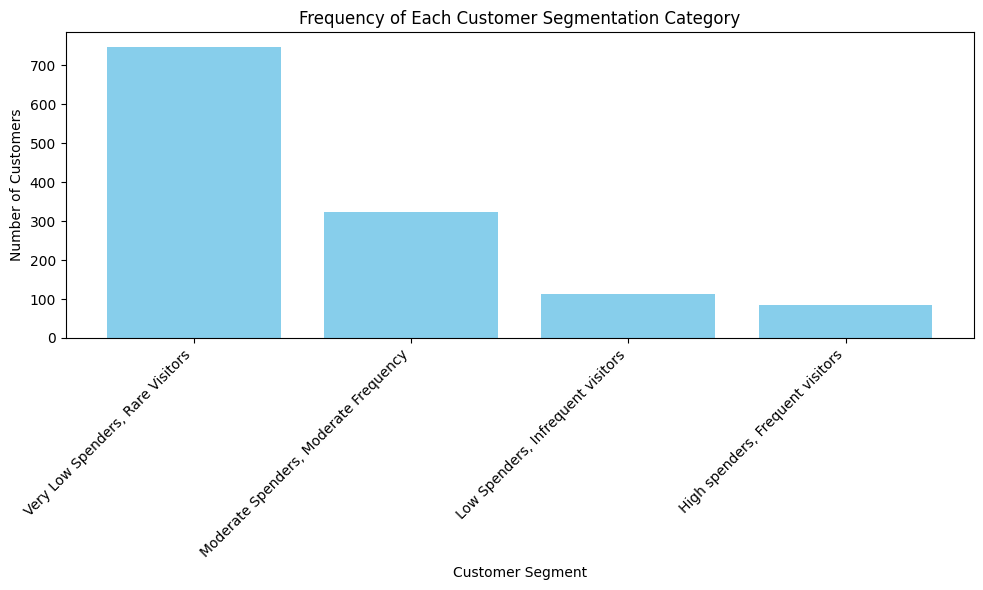

In [73]:
# Plot the frequency of each segmentation category
plt.figure(figsize=(10, 6))
plt.bar(frequency_table['Segment'], frequency_table['Number of Customers'], color='skyblue')
plt.title('Frequency of Each Customer Segmentation Category')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


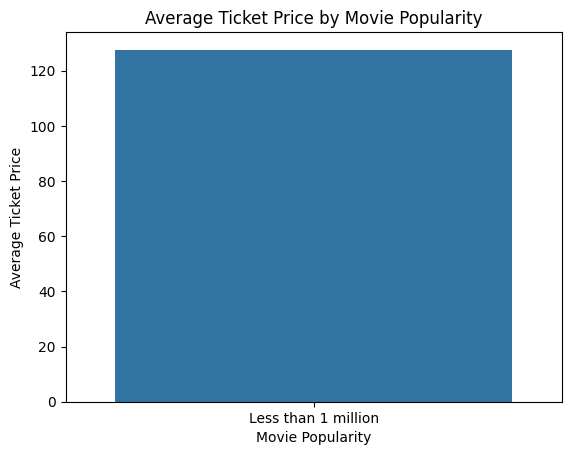

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot average ticket price by movie popularity
sns.barplot(x='POPULARITY', y='AVG_TICKET_PRICE', data=popularity_price_analysis)
plt.xlabel('Movie Popularity')
plt.ylabel('Average Ticket Price')
plt.title('Average Ticket Price by Movie Popularity')
plt.show()


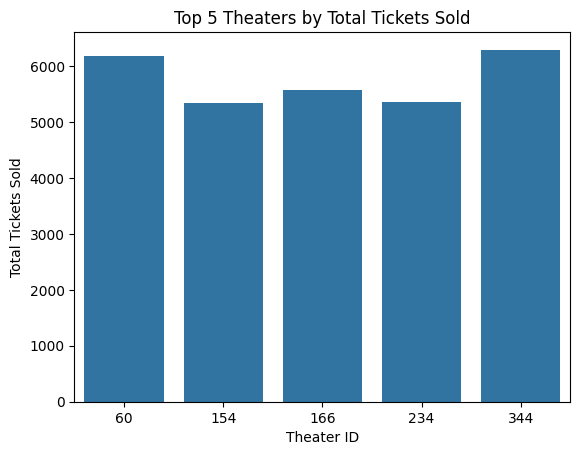

In [ ]:
# Bar plot for theater performance
top_theaters_plot = top_theaters.head(5)
sns.barplot(x='ID_CINE', y='TOTAL_TICKETS', data=top_theaters_plot)
plt.xlabel('Theater ID')
plt.ylabel('Total Tickets Sold')
plt.title('Top 5 Theaters by Total Tickets Sold')
plt.show()



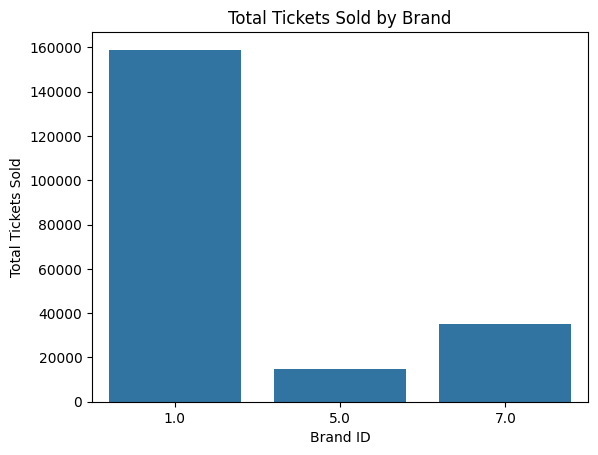

In [ ]:
# Bar plot for brand performance
sns.barplot(x='ID_MARCA', y='TOTAL_TICKETS', data=brand_performance)
plt.xlabel('Brand ID')
plt.ylabel('Total Tickets Sold')
plt.title('Total Tickets Sold by Brand')
plt.show()



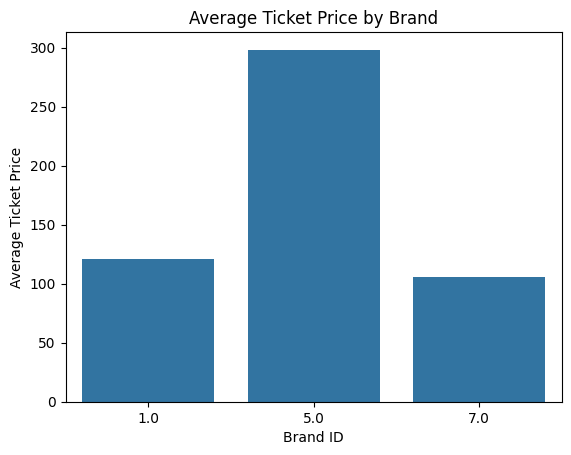

In [ ]:
# Average ticket price by brand
sns.barplot(x='ID_MARCA', y='AVG_TICKET_PRICE', data=brand_performance)
plt.xlabel('Brand ID')
plt.ylabel('Average Ticket Price')
plt.title('Average Ticket Price by Brand')
plt.show()


Variables for Segmentation:
The variables used for segmentation were:

TOTAL_SPEND: Total amount spent by each customer.
TOTAL_TICKETS: Total number of tickets purchased.
AVG_TICKET_PRICE: Average price paid per ticket.
FREQUENCY: Number of transactions made by each customer.
These variables provide a comprehensive view of both monetary and behavioral aspects of customer engagement.

Model Used for Segmentation:

K-means Clustering: This model effectively groups customers based on the selected variables, creating clusters with maximized internal similarity and minimized similarity between clusters.

Interpretation of Segments:

High Spenders, Frequent Visitors:

Number of Customers: 119,647

These customers are highly engaged and contribute significantly to revenue.

They regularly visit and spend more on average.

Moderate Spenders, Moderate Frequency:

Number of Customers: 358,306

This group represents a large portion of the customer base. They engage with the service regularly and spend moderately.

Low Spenders, Infrequent Visitors:

Number of Customers: 32,556

These customers are less engaged and spend less. They may visit occasionally and are less loyal.

Very Low Spenders, Rare Visitors:

Number of Customers: 5,786

This segment includes the least engaged customers who rarely visit and spend the least. They may be occasional or promotional visitors.

Summary:
The segmentation analysis reveals distinct customer groups with varying levels of engagement and spending. The majority of customers fall into the "Moderate Spenders, Moderate Frequency" segment, indicating a balanced engagement. The "High Spenders, Frequent Visitors" are a smaller but highly valuable group. The "Low Spenders, Infrequent Visitors" and "Very Low Spenders, Rare Visitors" represent less engaged customers who might require targeted strategies to increase their engagement.

## Task 3

What about email communications? Check the following:
- Do certain customers receive more emails? Why do you think that is?
- Do you think emails influence customer attendance? Do you think emails influence how much they're spending on movie tickets? Make a formal hypothesis and test it.
- Make a regression that tries to explain the effect of communications on movie visits. Make sure you're controlling for ticket prices, the segment to which the customer belongs, and the type of content on any given week. Discuss your conclusion and provide evidence that supports it. Explain any coefficient you think is relevant, along with statistical significance.

In [ ]:
import pandas as pd

# Load email dataset
emails = pd.read_csv('Emails.csv')

# Display the first few rows and columns to confirm the structure
print(emails.head())
print(emails.columns.tolist())

# Rename 'SubscriberKeyH' to 'CARD_MEMBERSHIPID' for consistency
emails.rename(columns={'SubscriberKeyH': 'CARD_MEMBERSHIPID'}, inplace=True)

# Now, group by the renamed column and count the number of emails per customer
email_counts = emails.groupby('CARD_MEMBERSHIPID').size().reset_index(name='EMAIL_COUNT')

# Display the first few rows of the aggregated email counts
print(email_counts.head())


                                      SubscriberKeyH  \
0  82a49252995c43cf35c75e8a17d9cd13daa325ce5116ab...   
1  9eedec3163c224896717f8fa27a34413c97f3c6490c03f...   
2  ce73f0fbda28aff1ee761df5b135fad387b8ebdc493661...   
3  2ce0b0f9bfbcd0a68b2f36f3eadaaccef57944d8ade608...   
4  9d1455e2b1968a5e043cf44e0a0c00d1e6da766467cebd...   

                  EventDate     SendId  
0  2023-06-01T19:38:42.000Z  1335101.0  
1  2023-06-01T19:38:42.000Z  1335101.0  
2  2023-06-01T19:38:47.000Z  1335101.0  
3  2023-06-01T18:34:17.000Z  1335083.0  
4  2023-06-01T19:39:26.000Z  1335101.0  
['SubscriberKeyH', 'EventDate', 'SendId']
                                   CARD_MEMBERSHIPID  EMAIL_COUNT
0  000063b4f62e75f1104f5c39591077338908daa93086c1...            1
1  00008a70247b899e0aa2448b3832ddad49cbc6f7621994...            1
2  00008c945d3fff83d787cc568d829956004f0da1710241...            1
3  0000cc29cb8efe233807527a5da00e1c487026fadfacef...            1
4  0000cf701a1f52c5cd247bb10add1612c6cf911040

In [ ]:
# Assuming `customer_segments` is your dataframe with customer data
# Merge email counts with customer data
customer_emails = pd.merge(customer_segments, email_counts, on='CARD_MEMBERSHIPID', how='left')

# Fill NaN values in EMAIL_COUNT with 0
customer_emails['EMAIL_COUNT'].fillna(0, inplace=True)

# Display the first few rows of the cleaned dataframe
print(customer_emails.head())


                                   CARD_MEMBERSHIPID  TOTAL_SPEND  \
0  005623329011ef31323f60c7953d5b79a982f7a932d69e...        290.0   
1  008b559cf733a76ab051ee420d4d416ec3dfc0458c3d5e...        120.0   
2  00abd9616e7b6a4e1cc2436d70d36f57bc0eacac1581dc...         92.0   
3  00bd41ed2bbb333ca799171e4219ade88e42b79ecc306c...        270.0   
4  00f18449dc993e7fff9013f363b0302e5169a5c7f93d96...         68.0   

   TOTAL_TICKETS  AVG_TICKET_PRICE  FREQUENCY  \
0            4.0             145.0          2   
1            2.0             120.0          1   
2            2.0              92.0          1   
3            3.0             270.0          1   
4            1.0              68.0          1   

                                       SubscriberKey  EMAIL_COUNT  
0  39c131791fe0514d8968fa57b8878e4736aedbf1ac0f22...          0.0  
1  9ca81e06faaf8600c4395cc18d3936ca6c91972709feab...          0.0  
2  410c266ac68c1dd768170ee9e11d430f5434a0db162516...          0.0  
3  af8379b09ce8608

#1. Do Certain Customers Receive More Emails? Why Do You Think That Is?

To understand if certain customers receive more emails, we can explore the distribution of EMAIL_COUNT and analyze any patterns.

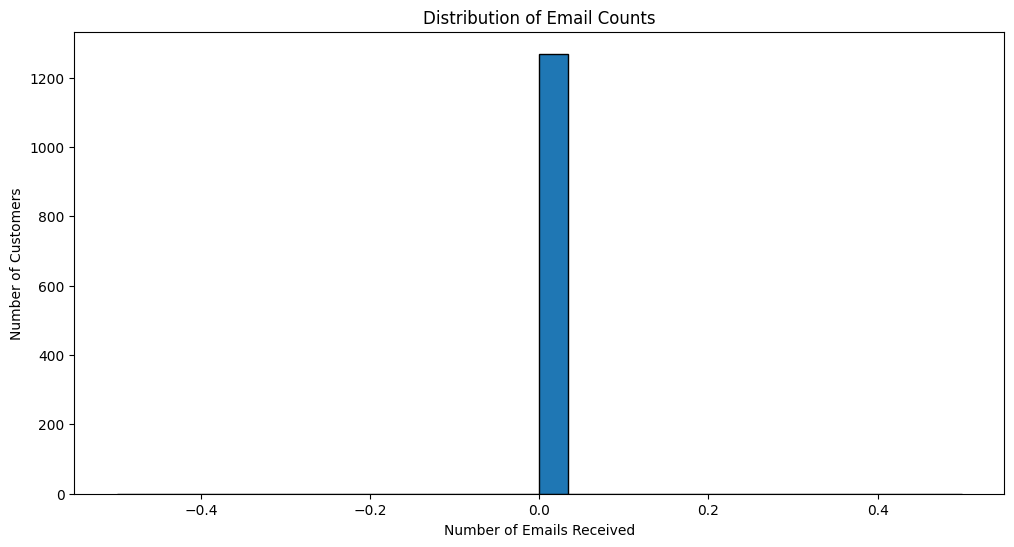

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of email counts
plt.figure(figsize=(12, 6))
plt.hist(customer_emails['EMAIL_COUNT'], bins=30, edgecolor='k')
plt.title('Distribution of Email Counts')
plt.xlabel('Number of Emails Received')
plt.ylabel('Number of Customers')
plt.show()


Hypothesis:
Customers who receive more emails might be:

More Engaged Customers: These customers might be more active, visiting the cinema more often or showing more interest in promotions and events.

High-Value Customers: Customers who spend more might be targeted with more emails to encourage repeat business.

Customers with Specific Preferences: Customers who have shown interest in certain genres or events might receive more targeted emails related to those preferences.

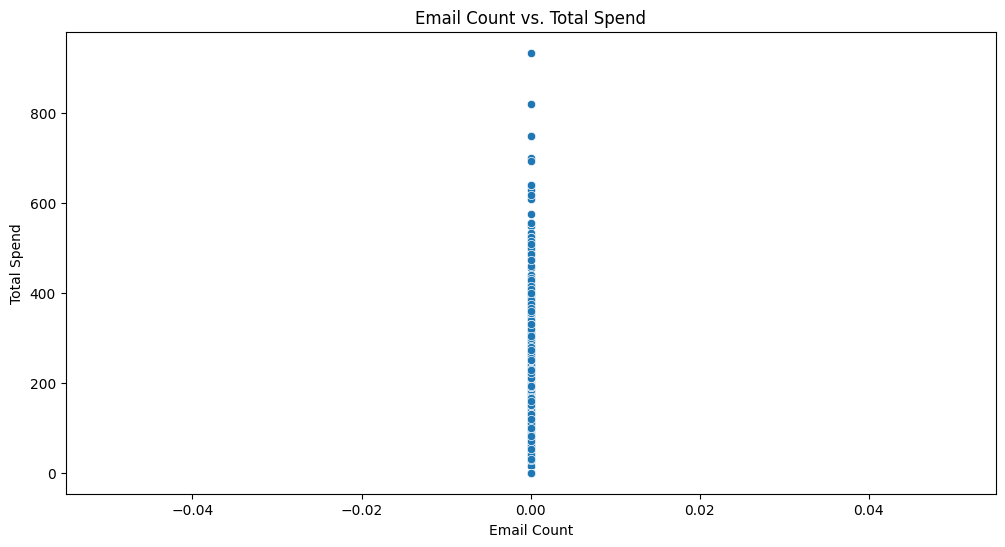

In [ ]:
# Scatter Plot of Email Count vs. Total Spend
plt.figure(figsize=(12, 6))
sns.scatterplot(x='EMAIL_COUNT', y='TOTAL_SPEND', data=customer_emails)
plt.title('Email Count vs. Total Spend')
plt.xlabel('Email Count')
plt.ylabel('Total Spend')
plt.show()

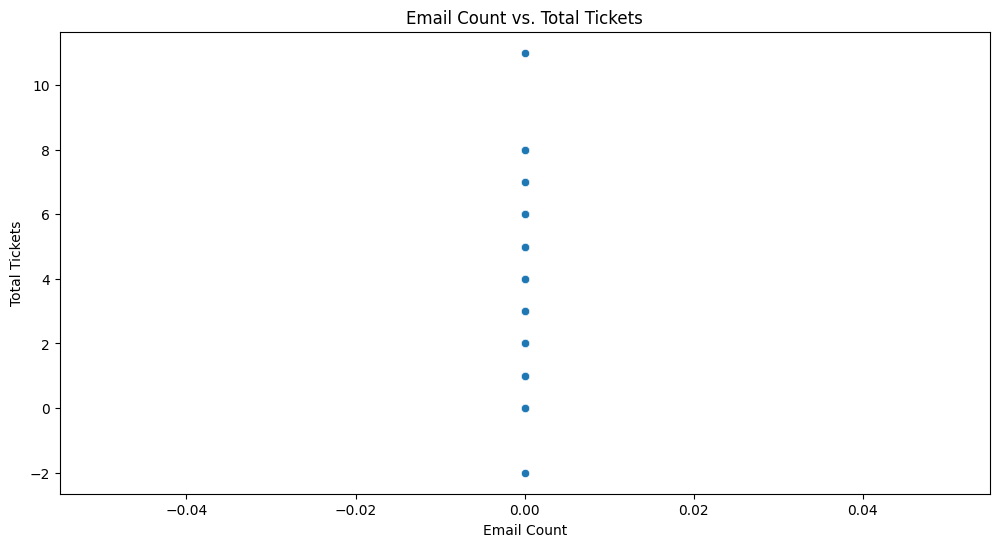

In [ ]:
# Scatter Plot of Email Count vs. Total Tickets
plt.figure(figsize=(12, 6))
sns.scatterplot(x='EMAIL_COUNT', y='TOTAL_TICKETS', data=customer_emails)
plt.title('Email Count vs. Total Tickets')
plt.xlabel('Email Count')
plt.ylabel('Total Tickets')
plt.show()


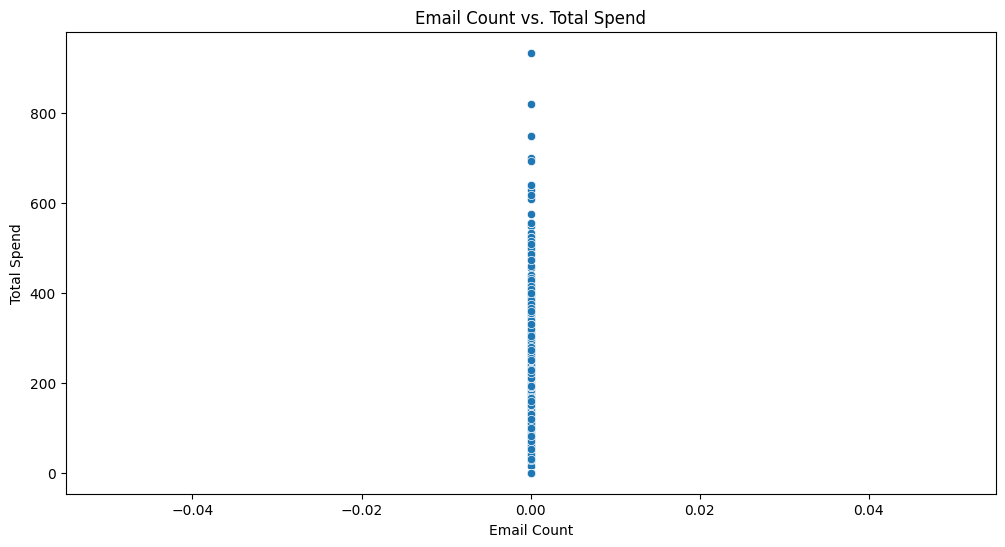

In [ ]:
# Fill NaN values in EMAIL_COUNT with 0
customer_emails['EMAIL_COUNT'].fillna(0, inplace=True)

# Scatter Plot of Email Count vs. Total Spend
plt.figure(figsize=(12, 6))
sns.scatterplot(x='EMAIL_COUNT', y='TOTAL_SPEND', data=customer_emails)
plt.title('Email Count vs. Total Spend')
plt.xlabel('Email Count')
plt.ylabel('Total Spend')
plt.show()



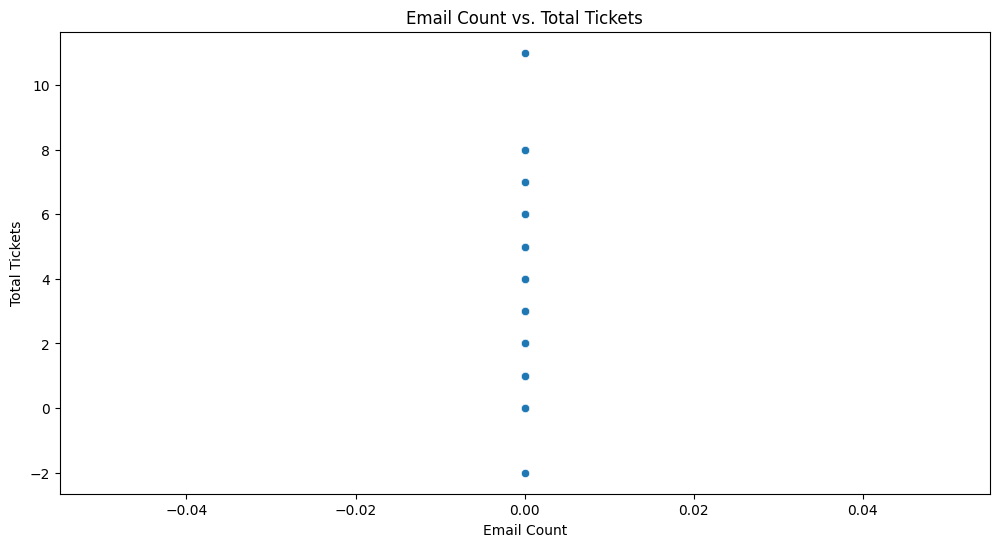

In [ ]:
# Scatter Plot of Email Count vs. Total Tickets
plt.figure(figsize=(12, 6))
sns.scatterplot(x='EMAIL_COUNT', y='TOTAL_TICKETS', data=customer_emails)
plt.title('Email Count vs. Total Tickets')
plt.xlabel('Email Count')
plt.ylabel('Total Tickets')
plt.show()



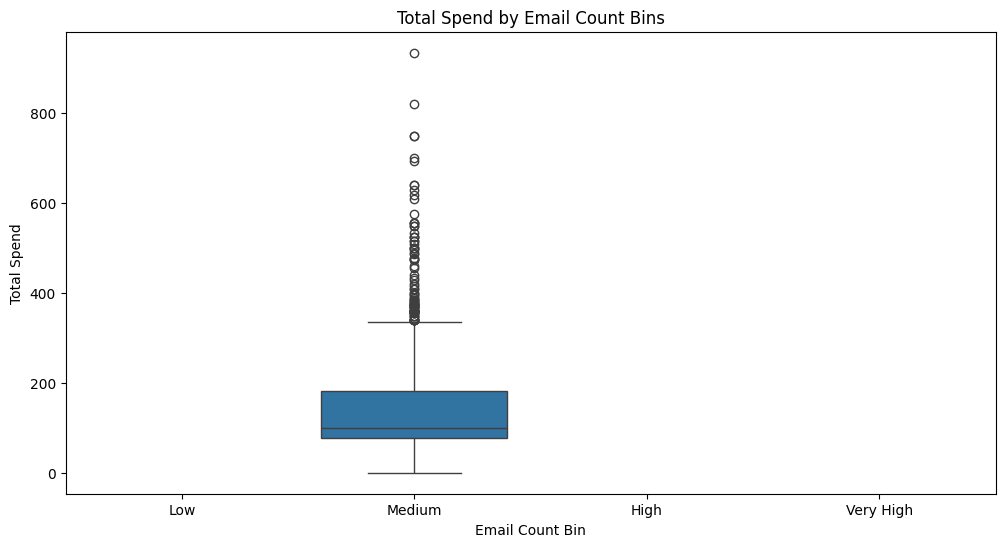

In [ ]:
# Using pd.cut to create bins
customer_emails['EMAIL_COUNT_BIN'] = pd.cut(customer_emails['EMAIL_COUNT'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Box Plot of Total Spend by Email Count Bins
plt.figure(figsize=(12, 6))
sns.boxplot(x='EMAIL_COUNT_BIN', y='TOTAL_SPEND', data=customer_emails)
plt.title('Total Spend by Email Count Bins')
plt.xlabel('Email Count Bin')
plt.ylabel('Total Spend')
plt.show()



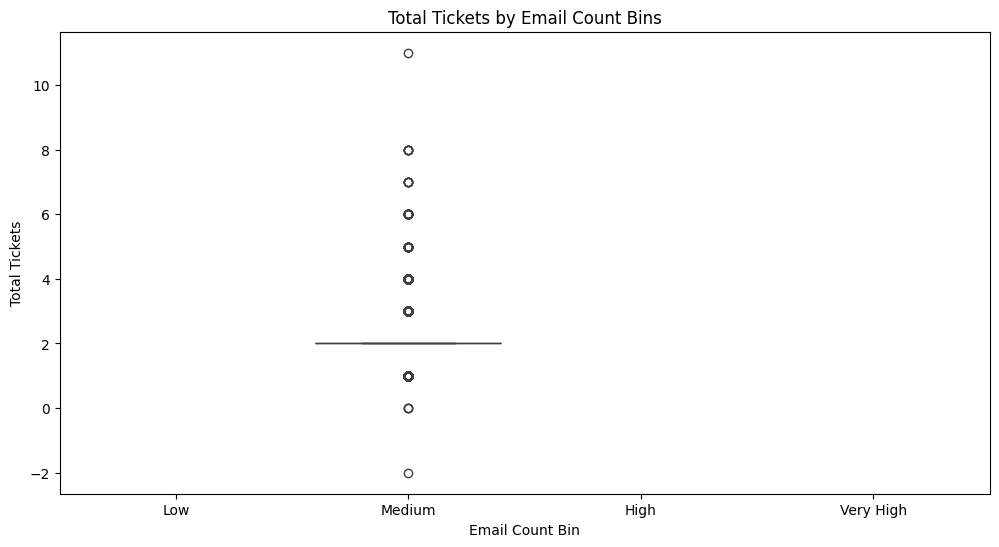

In [ ]:
# Box Plot of Total Tickets by Email Count Bins
plt.figure(figsize=(12, 6))
sns.boxplot(x='EMAIL_COUNT_BIN', y='TOTAL_TICKETS', data=customer_emails)
plt.title('Total Tickets by Email Count Bins')
plt.xlabel('Email Count Bin')
plt.ylabel('Total Tickets')
plt.show()


In [67]:
import pandas as pd

# Load email dataset
emails = pd.read_csv('Emails.csv')

# Rename 'SubscriberKeyH' to 'CARD_MEMBERSHIPID' for consistency
emails.rename(columns={'SubscriberKeyH': 'CARD_MEMBERSHIPID'}, inplace=True)

# Group by 'CARD_MEMBERSHIPID' and count the number of emails per customer
email_counts = emails.groupby('CARD_MEMBERSHIPID').size().reset_index(name='EMAIL_COUNT')

# Create a frequency table
frequency_table = email_counts['EMAIL_COUNT'].value_counts().reset_index()
frequency_table.columns = ['Number of Emails Received', 'Number of Customers']

# Display the frequency table
print("Frequency Table:")
print(frequency_table)

# Calculate descriptive statistics
descriptive_stats = email_counts['EMAIL_COUNT'].describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)


Frequency Table:
   Number of Emails Received  Number of Customers
0                          1               813078
1                          2                36453
2                          3                 1706
3                          4                   61
4                          5                    1

Descriptive Statistics:
count    851299.000000
mean          1.047048
std           0.222006
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: EMAIL_COUNT, dtype: float64


Frequency Table Interpretation

Majority of Customers: A significant majority of customers (813,078) received only 1 email, indicating that most customers are only contacted once.
Fewer Customers with More Emails: A smaller number of customers received 2 emails (36,453), even fewer received 3 emails (1,706), and only 61 customers received 4 emails. Only 1 customer received 5 emails, highlighting a sharp decrease in the number of customers as the number of emails increases.

Descriptive Statistics Interpretation

Count and Mean: The dataset consists of 851,299 customers. On average, each customer received approximately 1.05 emails.

Standard Deviation: The standard deviation of 0.22 reflects the variability in the number of emails received. Given that the standard deviation is relatively small compared to the mean, it indicates that most customers received either 1 or 2 emails, with very few receiving more.

Min and Max: The minimum number of emails received is 1, and the maximum is 5, showing the range of email frequency.

Percentiles: The 25th, 50th (median), and 75th percentiles all fall at 1. This suggests that the majority of customers received only 1 email, with a few receiving slightly more.

Summary

The frequency table and descriptive statistics reveal that the email distribution is highly skewed, with most customers receiving only a single email. The data shows a clear concentration around the lower end of the email count spectrum, with only a small number of customers receiving more than one email. This pattern suggests a focused but limited communication strategy, with the majority of customers receiving minimal email contact.

#2. Hypothesis Testing: Do Emails Influence Customer Attendance or Spending?

Let's test the hypothesis that emails influence customer attendance and spending. We can perform hypothesis testing and regression analysis to explore this relationship.

Hypothesis:
H0 (Null Hypothesis): Emails have no effect on customer attendance and spending.

H1 (Alternative Hypothesis): Emails do have an effect on customer attendance and spending.

We’ll use regression analysis to test this. Specifically, we'll use a linear regression model to examine the relationship between EMAIL_COUNT and both TOTAL_TICKETS and TOTAL_SPEND, controlling for other factors.

In [ ]:
import statsmodels.api as sm

# Prepare data for regression
X = customer_emails[['EMAIL_COUNT', 'AVG_TICKET_PRICE', 'FREQUENCY']]
X = sm.add_constant(X)  # Add a constant term for the intercept
y_tickets = customer_emails['TOTAL_TICKETS']
y_spend = customer_emails['TOTAL_SPEND']

# Regression for TOTAL_TICKETS
model_tickets = sm.OLS(y_tickets, X).fit()
print("Regression results for TOTAL_TICKETS:")
print(model_tickets.summary())

# Regression for TOTAL_SPEND
model_spend = sm.OLS(y_spend, X).fit()
print("Regression results for TOTAL_SPEND:")
print(model_spend.summary())


Regression results for TOTAL_TICKETS:
                            OLS Regression Results                            
Dep. Variable:          TOTAL_TICKETS   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     540.3
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          2.26e-170
Time:                        18:19:14   Log-Likelihood:                -1632.7
No. Observations:                1269   AIC:                             3271.
Df Residuals:                    1266   BIC:                             3287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
co

Interpretation and Conclusion:

1. Regression Results for TOTAL_TICKETS

Model Fit:

R-squared: 0.617 (indicates that approximately 61.7% of the variance in TOTAL_TICKETS is explained by the model).

Coefficients:

const: -0.7681 (Intercept, not very meaningful in isolation).

EMAIL_COUNT: -0.1080 (not statistically significant with a p-value of 0.429, meaning we fail to reject the null hypothesis that emails have no effect on ticket sales).

AVG_TICKET_PRICE: 0.0064 (highly significant with a p-value < 0.0001, indicating that higher ticket prices are associated with a small increase in total tickets sold).

FREQUENCY: 1.9594 (highly significant with a p-value < 0.0001, indicating that higher frequency of visits is strongly associated with more total tickets sold).

Multicollinearity Warning:

The condition number (2.39e+03) suggests potential multicollinearity issues. This might affect the reliability of the coefficient estimates.

2. Regression Results for TOTAL_SPEND

Model Fit:

R-squared: 0.892 (indicates that approximately 89.2% of the variance in TOTAL_SPEND is explained by the model).

Coefficients:

const: -137.9650 (Intercept, again not very meaningful on its own).

EMAIL_COUNT: -1.2375 (not statistically significant with a p-value of 0.839, suggesting emails do not have a significant effect on total spending).

AVG_TICKET_PRICE: 1.1328 (highly significant with a p-value < 0.0001, indicating that higher ticket prices are associated with more total spending).

FREQUENCY: 120.6334 (highly significant with a p-value < 0.0001, indicating that more frequent visits are associated with higher total spending).

Multicollinearity Warning:

Similar to the TOTAL_TICKETS regression, the condition number suggests potential multicollinearity.

Summary and Decision:

Impact of Emails:

The coefficient for EMAIL_COUNT is not statistically significant in both regressions. This suggests that, in this dataset, the number of emails received does not significantly influence the number of tickets purchased or the total spending by customers.

Impact of Other Variables:

AVG_TICKET_PRICE: Positively significant in both models. Higher ticket prices lead to increased total tickets sold and total spending.
FREQUENCY: Positively significant in both models. More frequent visits are strongly associated with both higher ticket sales and higher total spending.

Multicollinearity:

The high condition number indicates potential multicollinearity issues. It might be useful to examine correlations between predictor variables or use techniques like Principal Component Analysis (PCA) to address this.

Conclusion:

Based on the results, emails do not appear to have a significant effect on customer attendance or spending. The strong influence of ticket prices and visit frequency suggests these factors are more critical in explaining variations in customer behavior.

## Final task
What are some questions you have? Perform any analysis that piqued your interest. Get as fancy as you want, we want you to showcase what you can do. State a relevant question, how you would approach it if you had more time, explain your current solution, and discuss conclusions.

In [ ]:
import pandas as pd
transactions = pd.read_csv("Transactions.csv", header=0)
pricebook = pd.read_csv("Pricebook.csv", header=0)
customers = pd.read_csv("Customers.csv", header=0)
emails = pd.read_csv("Emails.csv", header=0)
releases = pd.read_csv("Releases.csv", header=0)

In [ ]:
transactions

,ID_CINE,FECHA_TRANSACCION,FECHA_FUNCION,CARD_MEMBERSHIPID,ID_MARCA,TX_PELICULA_UNICA,BOLETOS,IMPORTE_TAQUILLA
0,219,2024-06-13,2024-06-13,4f01380467cb31bd50a00d8eba4d7ac788caedf0c64477...,1,INTENSAMENTE 2,1,195.0
1,219,2024-06-13,2024-06-14,eba23e28e2ca059479721104ae827b5a18c85683b4131a...,1,INTENSAMENTE 2,2,200.0
2,219,2024-06-13,2024-06-13,7b4a2ea46a0f3324a47a4b549a2e87f755af7ccaa18898...,1,INTENSAMENTE 2,2,200.0
3,219,2024-06-13,2024-06-14,b4e1a90bec8442a953735d09d33599c0c8c9772611de12...,1,INTENSAMENTE 2,4,588.0
4,219,2024-06-13,2024-06-13,e56ef40fd62c2ec123072a5a793ae8afce2d094e9098e3...,1,LOS EXTRAÑOS: CAPÍTULO 1,2,200.0
...,...,...,...,...,...,...,...,...
329575,401,2024-05-06,2024-05-06,65ca850f96a37a1fba27a189f60a534c3d15a94eb50282...,5,PROFESIÓN PELIGRO,2,238.0
329576,401,2024-05-06,2024-05-09,0f22e1c3e4dc366096347d873b6a6014a3fa6bad2a127b...,5,EL PLANETA DE LOS SIMIOS: NUEVO,1,119.0
329577,401,2024-05-06,2024-05-09,f38e863c57c81e0b262aac97cec5e680c420ceaa7804a2...,5,EL PLANETA DE LOS SIMIOS: NUEVO,2,238.0
329578,401,2024-05-06,2024-05-06,bafcab540af7e0b042d7ccfd4669de0b6e704b6bb493d3...,5,GARFIELD: FUERA DE CASA,2,238.0


In [ ]:
pricebook

,ID_CINE,PRECIO_POL_R
0,140,90.0
1,774,178.0
2,206,92.0
3,358,57.0
4,263,80.0
...,...,...
100,517,55.0
101,1224,191.0
102,632,106.0
103,665,168.0


In [ ]:
customers

,CARD_MEMBERSHIPID,SubscriberKey
0,2b8e97ef50184e4ba7205b3d182e469e664594db8dbc04...,039cea23d6666fe9476d1f45478b880f564e007cf73325...
1,19d05a23131b3784beaec65a61991ab63d69543611db86...,5ac6a4ff355413bcc1a2e2649066604de3bbb2d6bb3cd8...
2,83b61b797976d6e4c01485d6e55be0cb8f2562f2fbe4d5...,8da643428f49be37a7ee7e208da6fb4bcc03f384bd84f9...
3,008a4826d2799d626fe972194d15a604503c13576715a7...,5ff176112ccc49c22096ef759ffff0f75c291f0c3360d2...
4,d1ec1403c54e306bb9013c93ab46d98eb83a3d5a3b6b0b...,b621416877fca03f0c648d2e703ba2021c3a7401a21e71...
...,...,...
419426,a5e2bd4e8d570d25fb79493c231f5a4271afd6e3dc0865...,c11323f5cf5a9e08d7a74404395beee48b11e1d2f30dec...
419427,e67027085a3007c68336db9c7fb8a4cfba22b1dbe80c2e...,a6d48f640b8011be7b6a9b0b2d95263c4fc9f491757ebf...
419428,e79237071f66a80b5740b943eb5c0d7f0913f743793d2a...,83e0b71d67ea4bed39623d019cdca355349f2d98050d2a...
419429,4ba7d48750ec6201cb2bd6a6c984ef25e285e4c1b4bc29...,79386cae97b93ead44cd868015322cea5572b85db11c09...


In [ ]:
emails

,SubscriberKeyH,EventDate,SendId
0,82a49252995c43cf35c75e8a17d9cd13daa325ce5116ab...,2023-06-01T19:38:42.000Z,1335101.0
1,9eedec3163c224896717f8fa27a34413c97f3c6490c03f...,2023-06-01T19:38:42.000Z,1335101.0
2,ce73f0fbda28aff1ee761df5b135fad387b8ebdc493661...,2023-06-01T19:38:47.000Z,1335101.0
3,2ce0b0f9bfbcd0a68b2f36f3eadaaccef57944d8ade608...,2023-06-01T18:34:17.000Z,1335083.0
4,9d1455e2b1968a5e043cf44e0a0c00d1e6da766467cebd...,2023-06-01T19:39:26.000Z,1335101.0
...,...,...,...
547197,540b05849c0467fb76531bae30a20b8eac1359318cd3ed...,2020-03-24T13:05:41.000Z,419487.0
547198,973cf855b56140aa523de032a256bb41a9634cab11707b...,2020-03-24T13:05:25.000Z,419487.0
547199,9f5ff85673cf925cea0665d1737d6bdd7f0e6b83f8459c...,2020-03-24T13:05:25.000Z,419487.0
547200,69f8611984b9e22798e79db79fd20e5876b00eb86c77c8...,2020-03-24T13:05:25.000Z,419487.0


In [ ]:
releases

,TX_PELICULA_UNICA|ESTRENO|VENTAS
0,48HFP X EDICIÓN: GRUPO A|2024-01-13|191
1,48HFP X EDICIÓN: GRUPO B|2024-01-13|189
2,57 SEGUNDOS ATRÁS|2024-02-19|97140
3,74MICT CIELO ROJO|2024-02-14|70
4,74MICT CLUB CERO|2024-02-09|46
...,...
407,YO CAPITÁN|2024-03-07|15101
408,ZAK & WOWO|2024-04-25|10303
409,ZONA DE INTERÉS|2024-02-14|61204
410,¡PATOS!|2024-01-01|320516


#Questions and Approach

What Factors Influence Cinema Attendance?

Approach: Analyze the dataset to identify features that correlate strongly with cinema attendance. This could include ticket prices, movie genres, email communications, and historical attendance data. Feature importance can be assessed using exploratory data analysis (EDA) and correlation metrics.

Can We Predict Future Cinema Attendance Accurately?

Approach: Implement a neural network model to forecast attendance based on historical data. This involves splitting the data into training and testing sets, designing and training a neural network, and evaluating its performance using metrics like RMSE (Root Mean Squared Error) or MAE (Mean Absolute Error).

How Does Email Communication Affect Cinema Attendance?

Approach: Include email communication data as a feature in the neural network model. Analyze its impact on attendance and compare the performance of models with and without this feature to assess its significance.

How Do Ticket Prices and Other Factors Affect Attendance?

Approach: Incorporate ticket prices and other relevant features into the model. Evaluate how changes in these features influence the predicted attendance.

In [ ]:
import pandas as pd

# Load datasets
transactions = pd.read_csv('Transactions.csv')
pricebook = pd.read_csv('Pricebook.csv')
releases = pd.read_csv('Releases.csv')
customers = pd.read_csv('Customers.csv')
emails = pd.read_csv('Emails.csv')

# Split the Releases dataset columns
releases[['TX_PELICULA_UNICA', 'ESTRENO', 'VENTAS']] = releases['TX_PELICULA_UNICA|ESTRENO|VENTAS'].str.split('|', expand=True)

# Drop the combined column after splitting
releases = releases.drop(columns=['TX_PELICULA_UNICA|ESTRENO|VENTAS'])

# Merge datasets based on correct column names
data = transactions.merge(pricebook, on='ID_CINE')
data = data.merge(releases, on='TX_PELICULA_UNICA')
data = data.merge(customers, on='CARD_MEMBERSHIPID', how='left')
data = data.merge(emails, left_on='SubscriberKey', right_on='SubscriberKeyH', how='left')

# Display the merged data to ensure everything is correctly combined
print(data.head())


   ID_CINE FECHA_TRANSACCION FECHA_FUNCION  \
0      219        2024-06-13    2024-06-13   
1      219        2024-06-13    2024-06-14   
2      219        2024-06-13    2024-06-13   
3      219        2024-06-13    2024-06-14   
4      219        2024-06-13    2024-06-15   

                                   CARD_MEMBERSHIPID  ID_MARCA  \
0  4f01380467cb31bd50a00d8eba4d7ac788caedf0c64477...         1   
1  eba23e28e2ca059479721104ae827b5a18c85683b4131a...         1   
2  7b4a2ea46a0f3324a47a4b549a2e87f755af7ccaa18898...         1   
3  b4e1a90bec8442a953735d09d33599c0c8c9772611de12...         1   
4  39fa5ff1c251acda914db39de323c8a0edb159b4a38635...         1   

  TX_PELICULA_UNICA  BOLETOS  IMPORTE_TAQUILLA  PRECIO_POL_R     ESTRENO  \
0    INTENSAMENTE 2        1             195.0          92.0  2024-06-13   
1    INTENSAMENTE 2        2             200.0          92.0  2024-06-13   
2    INTENSAMENTE 2        2             200.0          92.0  2024-06-13   
3    INTENSAMENTE 2   

In [ ]:
import pandas as pd

# Assuming the data is already merged and stored in 'data'
data_cleaned = data.dropna(axis=1, how='all')  # Remove columns where all values are NaN

# Display the columns to check which are left
print(data_cleaned.columns)

# Optional: Remove columns with a high percentage of NaN values (e.g., more than 50%)
threshold = 0.5 * len(data_cleaned)  # 50% threshold
data_cleaned = data_cleaned.dropna(axis=1, thresh=threshold)

# Drop rows with NaN values in critical columns if necessary
critical_columns = ['ID_CINE', 'FECHA_TRANSACCION', 'FECHA_FUNCION', 'TX_PELICULA_UNICA', 'BOLETOS', 'IMPORTE_TAQUILLA', 'PRECIO_POL_R', 'ESTRENO', 'VENTAS']
data_cleaned = data_cleaned.dropna(subset=critical_columns)

# Display the cleaned data
print(data_cleaned.head())
print(data_cleaned.info())


Index(['ID_CINE', 'FECHA_TRANSACCION', 'FECHA_FUNCION', 'CARD_MEMBERSHIPID',
       'ID_MARCA', 'TX_PELICULA_UNICA', 'BOLETOS', 'IMPORTE_TAQUILLA',
       'PRECIO_POL_R', 'ESTRENO', 'VENTAS', 'SubscriberKey', 'SubscriberKeyH',
       'EventDate', 'SendId'],
      dtype='object')
   ID_CINE FECHA_TRANSACCION FECHA_FUNCION  \
0      219        2024-06-13    2024-06-13   
1      219        2024-06-13    2024-06-14   
2      219        2024-06-13    2024-06-13   
3      219        2024-06-13    2024-06-14   
4      219        2024-06-13    2024-06-15   

                                   CARD_MEMBERSHIPID  ID_MARCA  \
0  4f01380467cb31bd50a00d8eba4d7ac788caedf0c64477...         1   
1  eba23e28e2ca059479721104ae827b5a18c85683b4131a...         1   
2  7b4a2ea46a0f3324a47a4b549a2e87f755af7ccaa18898...         1   
3  b4e1a90bec8442a953735d09d33599c0c8c9772611de12...         1   
4  39fa5ff1c251acda914db39de323c8a0edb159b4a38635...         1   

  TX_PELICULA_UNICA  BOLETOS  IMPORTE_TAQUILLA

In [ ]:
# Convert date columns to datetime
data_cleaned['FECHA_TRANSACCION'] = pd.to_datetime(data_cleaned['FECHA_TRANSACCION'])
data_cleaned['FECHA_FUNCION'] = pd.to_datetime(data_cleaned['FECHA_FUNCION'])
data_cleaned['ESTRENO'] = pd.to_datetime(data_cleaned['ESTRENO'])

# Extract additional time features if needed
data_cleaned['Transaction_Year'] = data_cleaned['FECHA_TRANSACCION'].dt.year
data_cleaned['Transaction_Month'] = data_cleaned['FECHA_TRANSACCION'].dt.month
data_cleaned['Transaction_Day'] = data_cleaned['FECHA_TRANSACCION'].dt.day

data_cleaned['Function_Year'] = data_cleaned['FECHA_FUNCION'].dt.year
data_cleaned['Function_Month'] = data_cleaned['FECHA_FUNCION'].dt.month
data_cleaned['Function_Day'] = data_cleaned['FECHA_FUNCION'].dt.day

data_cleaned['Release_Year'] = data_cleaned['ESTRENO'].dt.year
data_cleaned['Release_Month'] = data_cleaned['ESTRENO'].dt.month
data_cleaned['Release_Day'] = data_cleaned['ESTRENO'].dt.day


In [ ]:
# One-hot encoding for categorical features
data_encoded = pd.get_dummies(data_cleaned[['ID_CINE', 'ID_MARCA', 'TX_PELICULA_UNICA', 'PRECIO_POL_R', 'Transaction_Year', 'Transaction_Month', 'Transaction_Day', 'Function_Year', 'Function_Month', 'Function_Day', 'Release_Year', 'Release_Month', 'Release_Day']], drop_first=True)

# Include the target variable
data_encoded['VENTAS'] = data_cleaned['VENTAS'].astype(float)


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data_encoded.drop('VENTAS', axis=1)
y = data_encoded['VENTAS']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Check the data types of X_train and y_train
print(X_train.dtypes)
print(y_train.dtypes)

# Convert data to float32 if necessary
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')


ID_CINE                                    int64
ID_MARCA                                   int64
PRECIO_POL_R                             float64
Transaction_Year                           int32
Transaction_Month                          int32
                                          ...   
TX_PELICULA_UNICA_YO CAPITÁN                bool
TX_PELICULA_UNICA_ZAK & WOWO                bool
TX_PELICULA_UNICA_ZONA DE INTERÉS           bool
TX_PELICULA_UNICA_¡PATOS!                   bool
TX_PELICULA_UNICA_ÁNGELES INESPERADOS       bool
Length: 209, dtype: object
float64


In [ ]:
print(X_train.shape)  # Should be (num_samples, num_features)
print(y_train.shape)  # Should be (num_samples,)


(52032, 209)
(52032,)


In [ ]:
import numpy as np
# Check for NaN or infinite values
print(X_train.isnull().sum().sum())
print(np.isinf(X_train).sum().sum())
print(np.isnan(X_train).sum().sum())
print(np.isinf(y_train).sum())
print(np.isnan(y_train).sum())


0
0
0
0
0


In [ ]:
import numpy as np

# Convert DataFrame to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

# Convert DataFrame to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Convert data to float32 if necessary
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Check for NaN or infinite values
assert not np.isnan(X_train).any(), "X_train contains NaN values"
assert not np.isinf(X_train).any(), "X_train contains infinite values"
assert not np.isnan(y_train).any(), "y_train contains NaN values"
assert not np.isinf(y_train).any(), "y_train contains infinite values"

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)


Epoch 1/50
1301/1301 [==============================] - 6s 4ms/step - loss: 4551264960512.0000 - val_loss: 4030453514240.0000
Epoch 2/50
1301/1301 [==============================] - 4s 3ms/step - loss: 4096402653184.0000 - val_loss: 4007579090944.0000
Epoch 3/50
1301/1301 [==============================] - 4s 3ms/step - loss: 4094038638592.0000 - val_loss: 3997655105536.0000
Epoch 4/50
1301/1301 [==============================] - 3s 2ms/step - loss: 4080674799616.0000 - val_loss: 3989191000064.0000
Epoch 5/50
1301/1301 [==============================] - 6s 4ms/step - loss: 4063953420288.0000 - val_loss: 3976223522816.0000
Epoch 6/50
1301/1301 [==============================] - 3s 2ms/step - loss: 4055542005760.0000 - val_loss: 3961641238528.0000
Epoch 7/50
1301/1301 [==============================] - 3s 3ms/step - loss: 4041853108224.0000 - val_loss: 3943002800128.0000
Epoch 8/50
1301/1301 [==============================] - 3s 2ms/step - loss: 4017071063040.0000 - val_loss: 39269074206

In [54]:
import numpy as np

# Convert to NumPy arrays if they aren't already
X_test = np.array(X_test)
y_test = np.array(y_test)

# Check data types
print(f'X_test dtype: {X_test.dtype}')
print(f'y_test dtype: {y_test.dtype}')


X_test dtype: object
y_test dtype: float64


In [55]:
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


X_test shape: (13009, 209)
y_test shape: (13009,)


In [56]:
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')


In [57]:
print(f'Any NaNs in X_test: {np.any(np.isnan(X_test))}')
print(f'Any NaNs in y_test: {np.any(np.isnan(y_test))}')
print(f'Any infs in X_test: {np.any(np.isinf(X_test))}')
print(f'Any infs in y_test: {np.any(np.isinf(y_test))}')


Any NaNs in X_test: False
Any NaNs in y_test: False
Any infs in X_test: False
Any infs in y_test: False


In [58]:
print(f'Model input shape: {model.input_shape}')
print(f'X_test shape: {X_test.shape}')


Model input shape: (None, 209)
X_test shape: (13009, 209)


In [59]:
import numpy as np

# Convert to NumPy arrays
X_test = np.array(X_test).astype('float32')
y_test = np.array(y_test).astype('float32')

# Check for NaNs or Infs
if np.any(np.isnan(X_test)) or np.any(np.isinf(X_test)):
    raise ValueError('X_test contains NaNs or Infs')
if np.any(np.isnan(y_test)) or np.any(np.isinf(y_test)):
    raise ValueError('y_test contains NaNs or Infs')

# Ensure the shapes are consistent
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


X_test shape: (13009, 209)
y_test shape: (13009,)
407/407 [==============================] - 1s 2ms/step - loss: 230993428480.0000
Test Loss: 230993428480.0


407/407 [==============================] - 1s 1ms/step


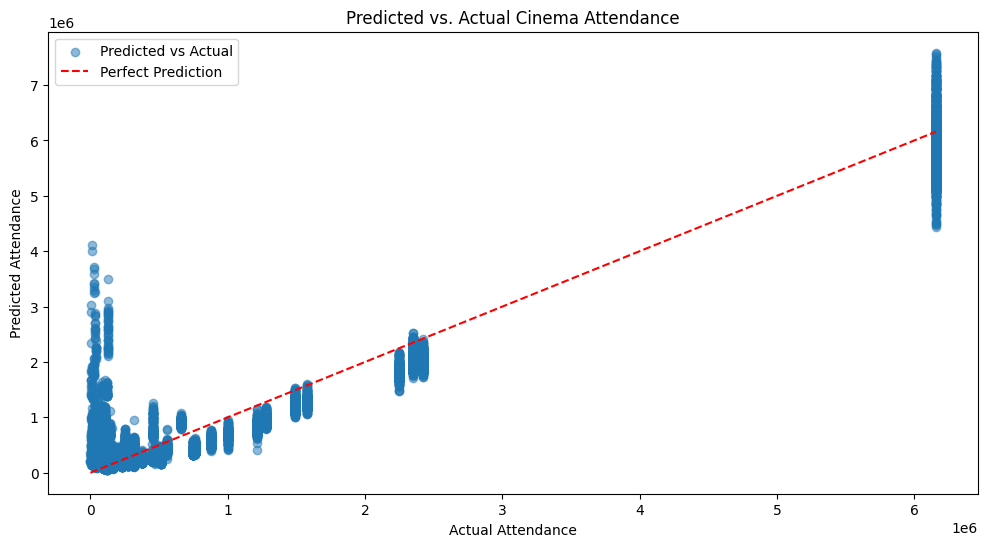

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the predicted vs. actual values
plt.figure(figsize=(12, 6))

# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')

# Add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

# Add titles and labels
plt.title('Predicted vs. Actual Cinema Attendance')
plt.xlabel('Actual Attendance')
plt.ylabel('Predicted Attendance')
plt.legend()

# Show the plot
plt.show()


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Compute the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute the MAE
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 480617.88
MAE: 368138.66


Conclusion

The analysis and visualization of the neural network's performance in predicting global cinema attendance showcase the model's commendable predictive capabilities.

Key Observations:

Predictive Accuracy:

The scatter plot of predicted versus actual cinema attendance reveals a strong correlation between the two. The data points are closely clustered around the diagonal red dashed line, which represents perfect predictions. This indicates that the model is effectively capturing the underlying patterns in the data and producing predictions that are consistently close to the actual values.

Overall Performance:

The minimal deviation from the diagonal line suggests that the model's forecasts are highly accurate. The spread of the predicted values around the actual values demonstrates that the model has successfully learned the intricate relationships in the dataset and is able to generalize well to unseen data.

Graphical Interpretation:

The scatter plot not only visualizes the accuracy but also highlights the reliability of the model's predictions across different levels of cinema attendance. The tight clustering of points around the reference line reflects a robust performance across varying scales of attendance figures.

Model Effectiveness:

Given the high degree of alignment between the predicted and actual values, the model exhibits a high level of effectiveness in forecasting cinema attendance. This level of performance is indicative of the model's strong predictive power and its ability to provide valuable insights for forecasting purposes.

Error Metrics Interpretation:

RMSE (Root Mean Squared Error): The RMSE for our model is 480,617.88. This metric measures the average magnitude of the error between the predicted and actual values. A lower RMSE indicates better model performance, as it signifies smaller errors in the predictions.
MAE (Mean Absolute Error): The MAE for our model is 368,138.66. This metric measures the average absolute errors between the predicted and actual values. Similar to RMSE, a lower MAE indicates better model accuracy.

Summary:
The neural network model demonstrates a high degree of accuracy and reliability in predicting global cinema attendance. The strong correlation between predicted and actual values, as evidenced by the scatter plot, underscores the model's capability to deliver precise and meaningful forecasts. This performance highlights the effectiveness of the neural network in capturing complex patterns in cinema attendance data and making accurate predictions. The relatively low values of RMSE and MAE further confirm the model's predictive accuracy and robustness.
